# MEDICAL INSURANCE CLASSIFICATION PROJECT

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA LOADING

In [2]:
df = pd.read_csv("Medical_insurance.csv")

In [3]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [4]:
df['Purchased'] = df['Purchased'].apply(lambda x :1 if x == 'purchased' else 0)

In [5]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.drop('User ID', axis=1, inplace =True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

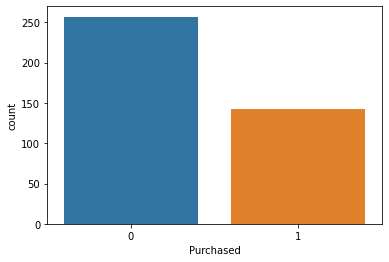

In [8]:
sns.countplot(x='Purchased', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

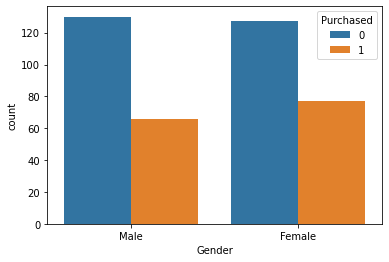

In [9]:
sns.countplot(x = 'Gender', hue='Purchased', data = df)

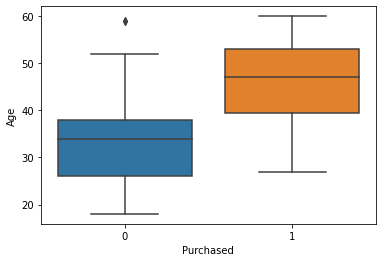

In [10]:
sns.boxplot(y = 'Age', x='Purchased', data = df);

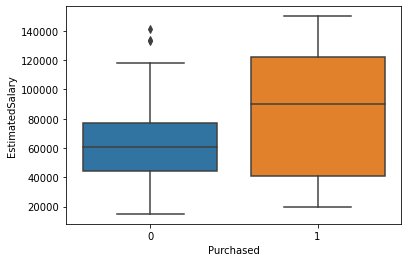

In [11]:
sns.boxplot(y = 'EstimatedSalary', x='Purchased', data = df);

In [12]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
#Split data into features and target
X = df.drop(['Purchased'], axis='columns')
y = df['Purchased']

In [14]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [16]:
pd.get_dummies(df['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [17]:
X = pd.get_dummies(X)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [21]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
logistic_prediction = logisticmodel.predict(X_test)

In [23]:
def ConfusionMatrix (ytest,ypred, label=['Positive','Negative']):
    from sklearn.metrics import confusion_matrix
    cm= confusion_matrix (ytest, ypred)
    plt.figure(figsize =(7,5))
    sns.heatmap(cm,annot=True,fmt='d', cbar='VlGn')
    plt.xlabel('predicted', fontsize=13)
    plt.xticks([0.5,1.5], label)
    plt.yticks([0.5,1.5], label)
    plt.ylabel('Truth', fontsize=13)
    plt.title('A Confusion Matrix');

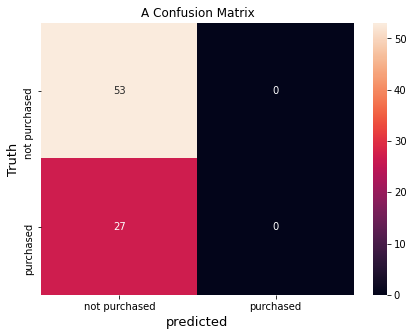

In [24]:
ConfusionMatrix(y_test, logistic_prediction, label=['not purchased', 'purchased'])

In [25]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

In [26]:
metrics.f1_score(y_test, logistic_prediction)

0.0

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [29]:
naivemodel.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
naive_prediction = naivemodel.predict(X_test)
naive_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

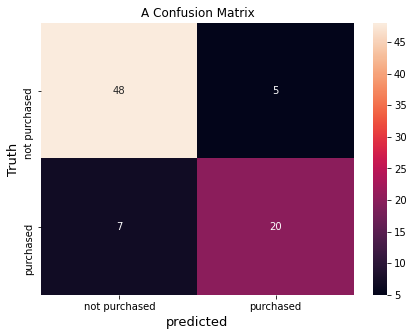

In [31]:
ConfusionMatrix(y_test, naive_prediction, label=['not purchased', 'purchased'])

In [32]:
metrics.accuracy_score(y_test, naive_prediction)

0.85

In [33]:
metrics.f1_score(y_test, naive_prediction)

0.7692307692307692

In [34]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
randomforestmodel.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [36]:
randomforest_prediction = randomforestmodel.predict(X_test)
randomforest_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

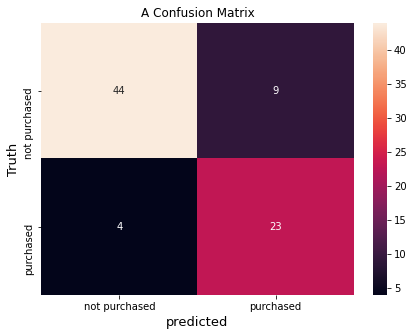

In [37]:
ConfusionMatrix(y_test, randomforest_prediction, label=['not purchased', 'purchased'])

In [38]:
metrics.accuracy_score(y_test, randomforest_prediction)

0.8375

In [39]:
metrics.f1_score(y_test, randomforest_prediction)

0.7796610169491525

In [40]:
from xgboost import XGBClassifier
xgboostmodel = XGBClassifier(use_label_encoder=False)
xgboostmodel.fit(X_train,y_train)

[18:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [41]:
from sklearn.svm import SVC
svmodel = SVC()
svmodel.fit(X_train,y_train)

SVC()

In [42]:
svmodel.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [53]:
sv_prediction = svmodel.predict(X_test)
sv_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

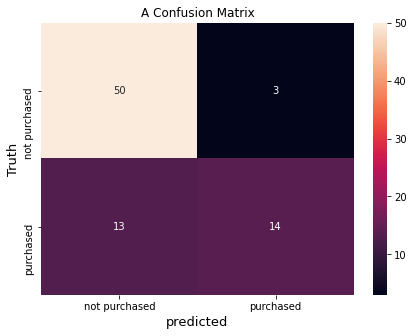

In [54]:
ConfusionMatrix(y_test, sv_prediction, label=['not purchased', 'purchased'])

In [55]:
metrics.accuracy_score(y_test, sv_prediction)

0.8

In [56]:
metrics.f1_score(y_test, sv_prediction)

0.6363636363636364

In [57]:
## Models Summary
#Deployment

In [58]:
#Save model to file
import pickle
pickle.dump(naivemodel, open("naivemodel.pickle.dat", "wb"))
print("Save model to: naivemodel.pickle.dat")

Save model to: naivemodel.pickle.dat


In [59]:
#load model from file
loaded_model = pickle.load(open("naivemodel.pickle.dat", "rb"))
print("Loaded model from: naivemodel.pickle.dat")

Loaded model from: naivemodel.pickle.dat


In [60]:
#make predictions for test data
predictions = loaded_model.predict(X_test)

In [62]:
#evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.00%
